In [2]:
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
df = pd.read_csv('day.csv')

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.season.unique()

array([1, 2, 3, 4])

In [5]:
df[['casual', 'cnt']].corr()

,casual,cnt
casual,1.000000,0.672804
cnt,0.672804,1.000000


In [6]:
target = 'cnt'
y = df[target]

In [7]:
df= df.drop(columns=['casual','registered','instant','dteday','mnth','yr'])

In [8]:
X = df.copy()
X = X.drop(target, axis=1)
X = pd.get_dummies(X,columns=['season','weekday','weathersit'])

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X


,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0.196364,0.189405,0.437273,0.248309,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,1,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,1,0.254167,0.226642,0.652917,0.350133,1,0,0,0,0,0,0,0,1,0,0,0,1,0
727,0,1,0.253333,0.255046,0.590000,0.155471,1,0,0,0,0,0,0,0,0,1,0,0,1,0
728,0,0,0.253333,0.242400,0.752917,0.124383,1,0,0,0,0,0,0,0,0,0,1,0,1,0
729,0,0,0.255833,0.231700,0.483333,0.350754,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [9]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones':predicciones,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()

    plt.plot(grouped.predicciones, grouped.y, label="Modelo", marker="o")
    plt.plot(grouped.predicciones, grouped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

# RLM

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)
# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)
# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_lineal=model.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.5542342007975312

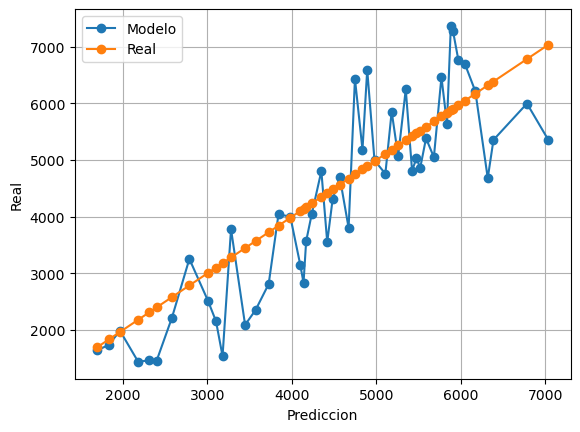

In [11]:
calibracion(predicciones_lineal, y_test, 50)

# Polinomial  de grado 2

In [12]:
degree = 2

poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2= model.predict(X_test)
r2_score(y_pred=predicciones_poly2, y_true=y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.837e+06, tolerance: 2.141e+05
  model = cd_fast.enet_coordinate_descent(


0.5652604828812039

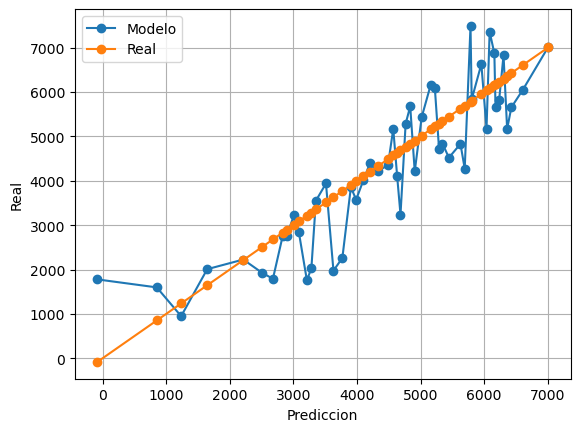

In [13]:
calibracion(predicciones_poly2, y_test, 50)

# Polinomial de grado 3

In [14]:
degree = 3

poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

#Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2, random_state = 42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3= model.predict(X_test)
r2_score(y_pred=predicciones_poly3, y_true=y_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.182e+08, tolerance: 2.141e+05
  model = cd_fast.enet_coordinate_descent(


0.2948136851939348

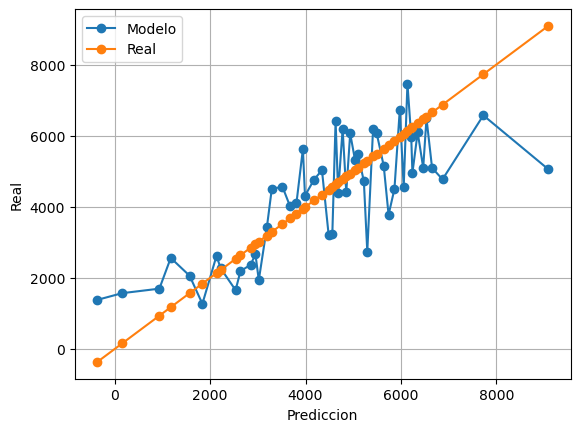

In [15]:
calibracion(predicciones_poly3, y_test, 50)

# AB TEST

In [16]:
holiday = df[df.holiday==1].cnt
workingday = df[df.workingday==1].cnt

In [17]:
## Crea un código base para el AB test
def AB_test(test, control):
    # Mu
    mu_test = test.mean()
    mu_control = control.mean()

    # SE
    se_test = test.sem()
    se_control = control.sem()

    # Differences
    mu_diff = mu_control - mu_test
    se_diff = np.sqrt((test.var()/len(test))+(control.var()/len(control)))

    # Z score and p value 
    z = mu_diff / se_diff

    p_value = stats.norm.cdf(z)

    print(f"Variable test entre {mu_test-2*se_test} y {mu_test+2*se_test}")
    print(f"Variable control entre {mu_control-2*se_control} y {mu_control+2*se_control}")
    print(f"Z score {z}")
    print(f"P value {p_value}")

In [18]:
holiday = df[df.holiday==1].cnt
workingday = df[df.workingday==1].cnt

In [19]:
AB_test(holiday, workingday)    

Variable test entre 2817.022512984841 y 4652.97748701516
Variable control entre 4416.809402672246 y 4752.830597327754
Z score 1.8212528653593318
P value 0.9657157861186356
